## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Vector Quantization (K-Means)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [4]:
def vq(X, K, maxIteration, minChangeRatio):
    (N, d) = X.shape
    # Initialize centers
    c = np.random.rand(K, d) * 0.1
    J_old = np.inf
    for i in range(maxIteration):
        dist = np.zeros([N, K])
        for j in range(K):
            cj = np.array(c[j, :], ndmin=2)
            cj_repeated = np.repeat(cj, N, axis=0)
            d = X - cj_repeated
            d **= 2
            d = np.sum(d, axis=1)
            dist[:, j] = d
        S = np.argmin(dist, axis=1)
        J = np.sum (dist[range(N),S])
        print ('VQ objective function:   ', J)
        if (J_old - J < minChangeRatio * J_old):
            break
        J_old = J
        if i != maxIteration - 1:
            for j in range(K):
                index = (S == j)
                Xj = X[index, :]
                if (Xj.shape[0] > 0):
                    cj = np.mean(Xj, axis=0)
                else:
                    print ('Empty Cluster')                
                c[j, :] = cj        
    return (c, S)

In [9]:
idx = MnistTrainY.squeeze() != 200
XTrain = MnistTrainX[idx,:]

In [11]:
K = 100
maxIteration = 100
minChangeRatio = 0.001
(c,S) = vq(XTrain, K, maxIteration, minChangeRatio)

VQ objective function:    4738214.23436979
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    2166659.1706707515
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1830793.1212857387
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1758521.2477939902
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1736349.2973936112
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1725292.2110545386
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1718445.96691985
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1714015.7797446824
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1711162.9488895047
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1708881.728577054
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1707067.048634216
Empty Cluster
Empty Cluster
Empty Cluster
VQ objective function:    1705578.7811329358


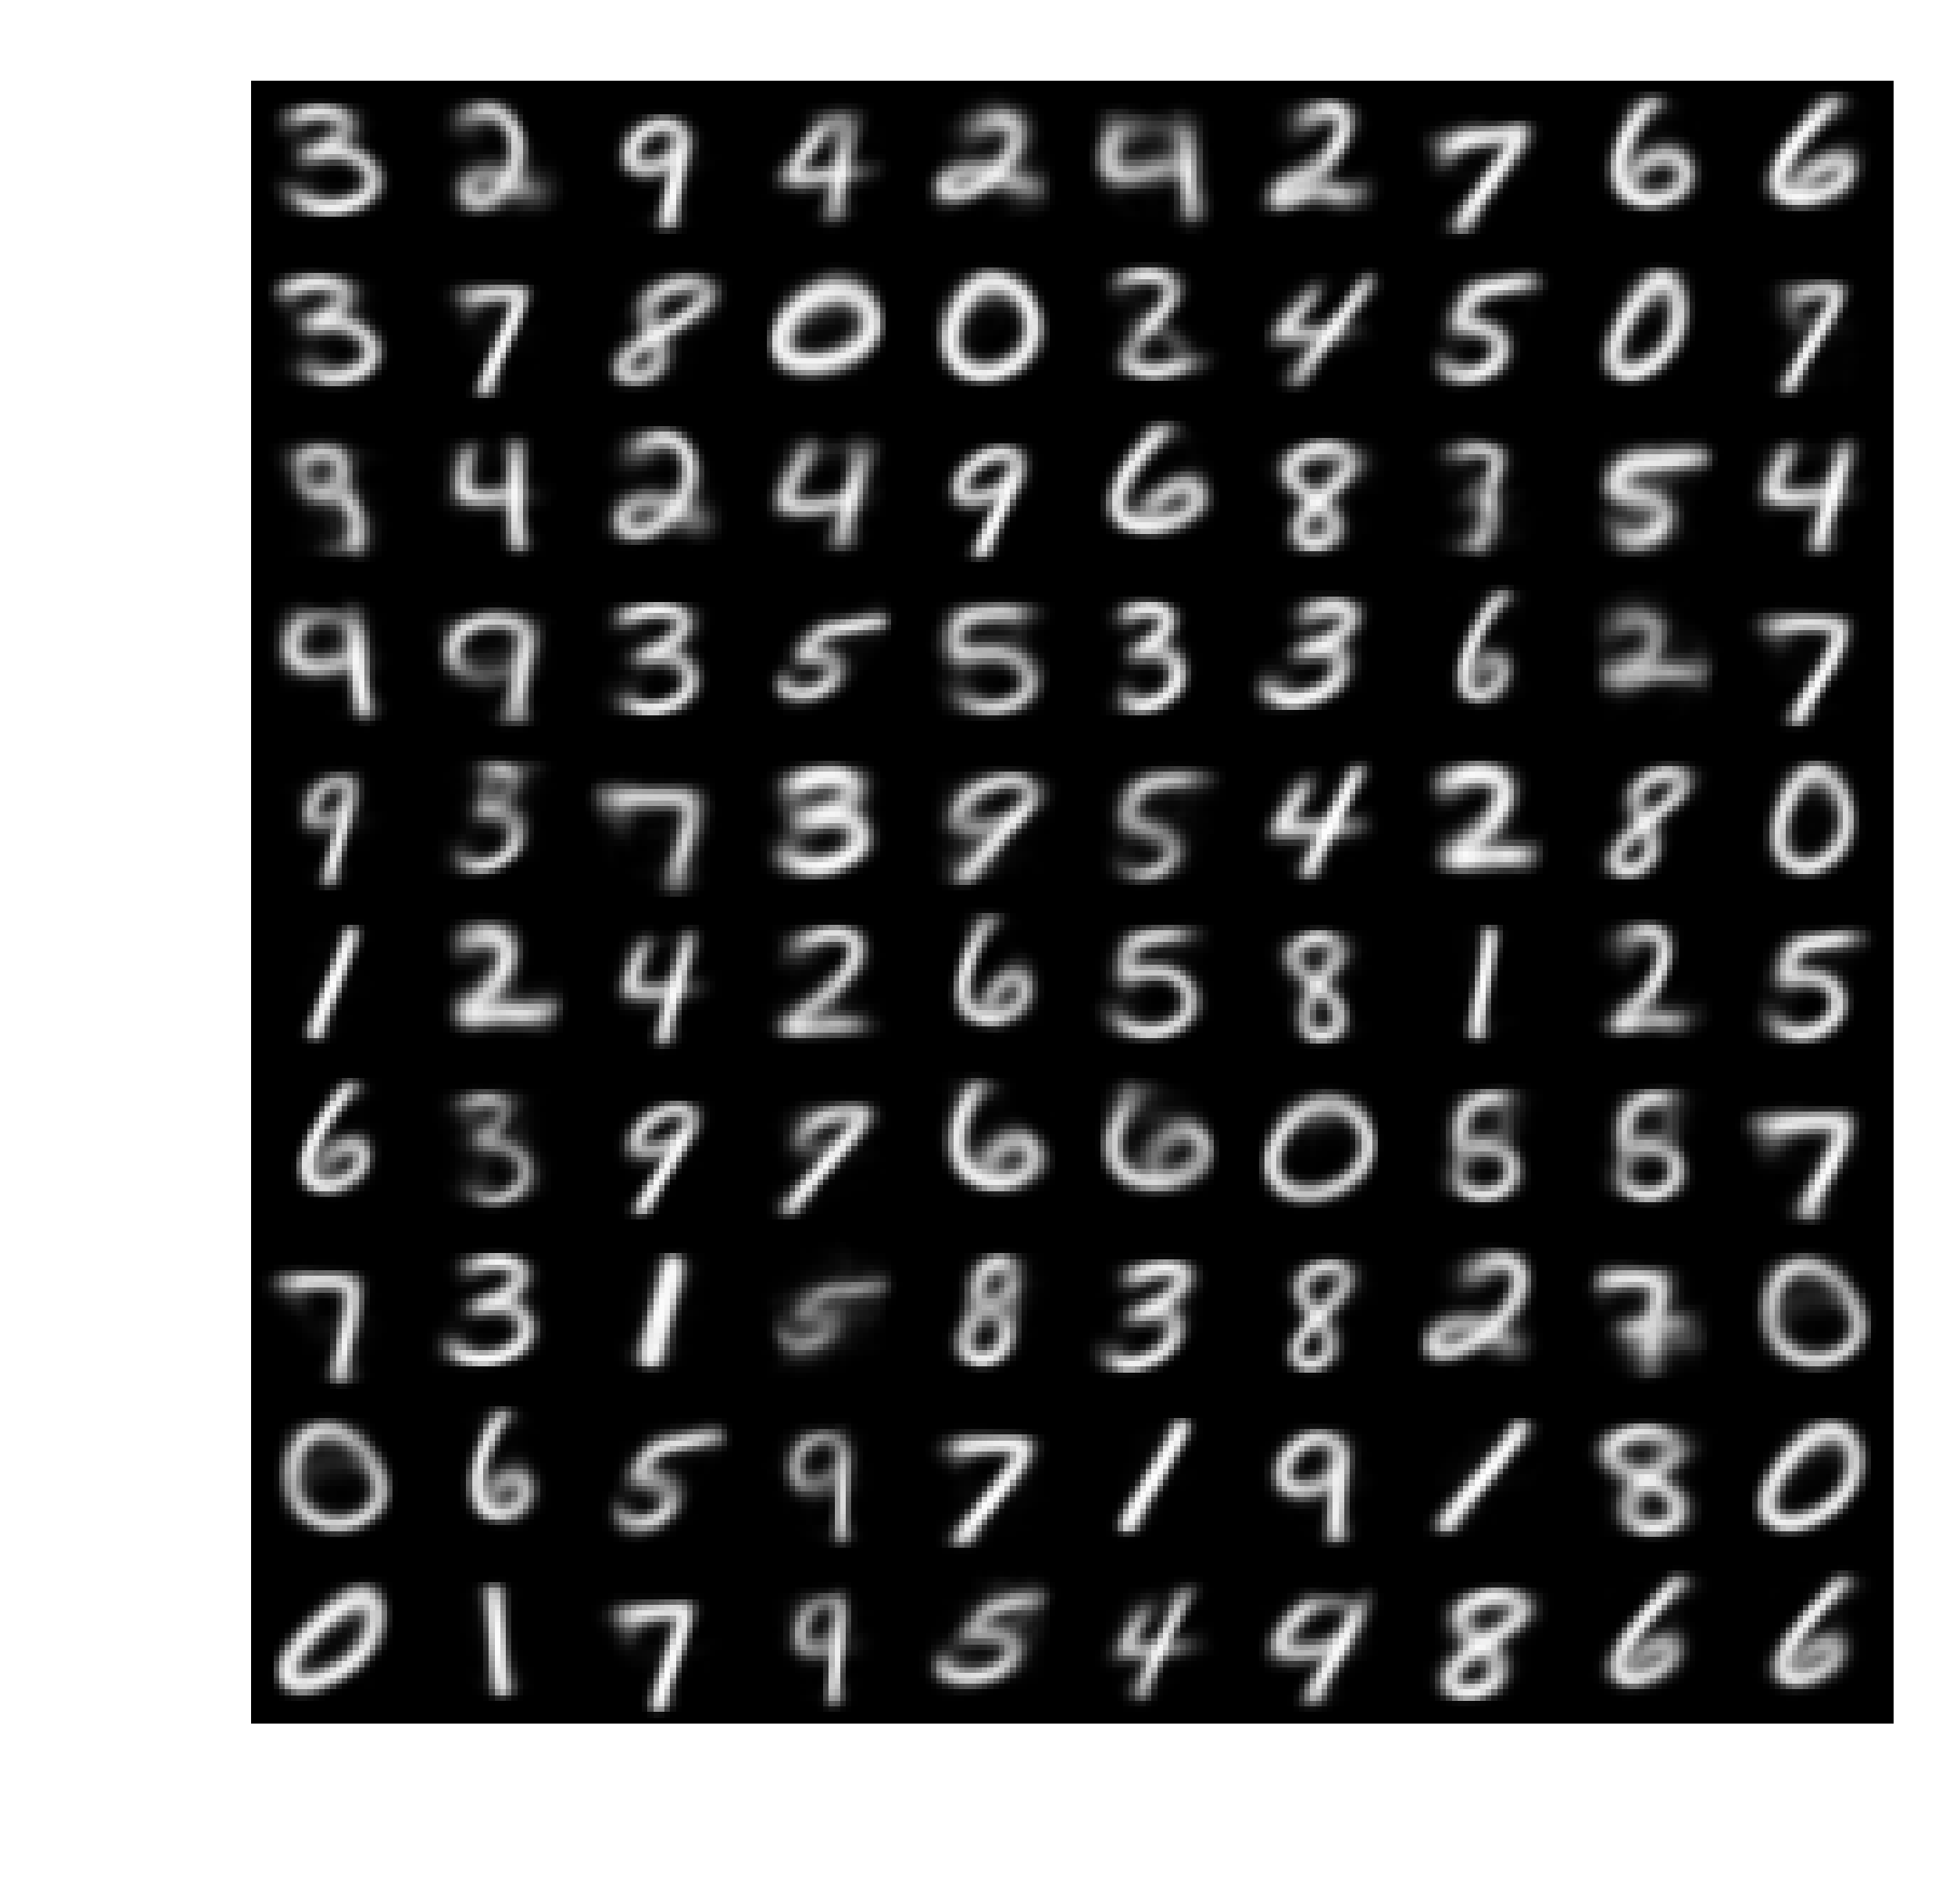

In [12]:
L = int(np.sqrt(K-1)+1)
img = np.zeros([L*29,L*29])
for i in range (L):
    for j in range (L):
        k = i * L + j
        if (k < K):
            img[i*29:i*29+28, j*29:j*29+28] = np.reshape(c[k,:], [28,28])

imh = plt.imshow (img, cmap='gray')
plt.imsave ('vq_all_100.png', img, cmap='gray')
plt.axis('off')
plt.show()